In [98]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
app_df = pd.read_csv (r'C:\Users\wasin\Downloads\application_record.csv')
credit_df = pd.read_csv (r'C:\Users\wasin\Downloads\credit_record.csv')

In [100]:
print(app_df.shape)
app_df.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


There are 438557 observations and 18 columns in the application record data frame, one column for identifying the applicant's ID.

In [101]:
print(credit_df.shape)
credit_df.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


There are 1048575 observations in the credit record data frame and 3 columns, one being the ID of the applicant.

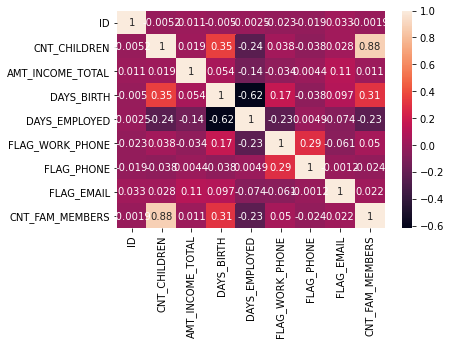

In [102]:
app_df['FLAG_MOBIL'].unique() 
app_df = app_df.drop(['FLAG_MOBIL'],axis = 1)
sns.heatmap(app_df.corr(), annot=True)

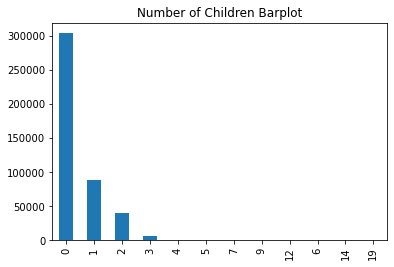

In [103]:
app_df['CNT_CHILDREN'].value_counts().plot.bar(title = 'Number of Children Barplot')

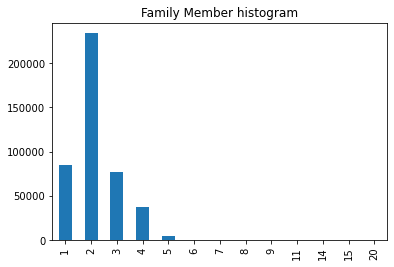

In [104]:
app_df['CNT_FAM_MEMBERS'].astype(int).value_counts().sort_index().plot.bar(title='Family Member histogram')

The mobile phone column only includes one unique value so it doesn't help our model. There isn't a reason to have this information so we should drop it out of our data set. We can see that family members highly correlates with the number of children the client has from the correlation matrix. This makes sense since a child is a family member. It might be a good decision to drop one of these variables as well to avoid multicollinearity in our model.

In [105]:
app_df['OCCUPATION_TYPE'].unique() #NaN in occupation type 
app_df.isnull().sum().sum() #134203 NaN observations in the occupation type column
print(1-sum(app_df['OCCUPATION_TYPE'].value_counts())/app_df.shape[0])

0.3060103931758016


There are 134203 missing values in the occupation type column. There's two options, either drop the entire occupation type column to retain all the observations that were included or drop all rows that have NaN in them. This means dropping 30% of the observations. I will drop the rows with NaN since we still have 304354 observations remaining which is plenty to work with.

In [106]:
app_df = app_df.dropna() # dropping the na values

In [107]:
app_df['AGE'] = app_df.DAYS_BIRTH.apply(lambda days_birth: int(-days_birth / 365)) #changing days to years to find age
app_df['YEARS_EMPLOYED'] = app_df.DAYS_EMPLOYED.apply(lambda days_employed: float(-days_employed / 365)) #changing days to years to find how long applicants have been employed

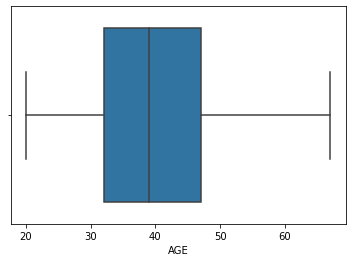

In [108]:
sns.boxplot(app_df['AGE'])

The median age for applicants is 39 years old. Most applicants are 32 to 47 years old. 

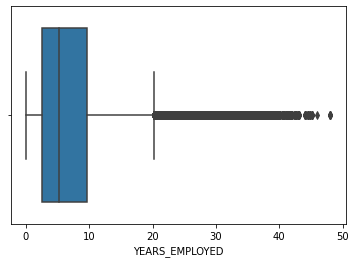

In [109]:
sns.boxplot(app_df['YEARS_EMPLOYED'])

The median for years that applicants are employed for is 5. When applicants apply, most of them have been employed between 2.5 and 9.6 years.

count     304354.000000
mean      194867.976380
std       116972.125938
min        27000.000000
25%       135000.000000
50%       180000.000000
75%       225000.000000
max      6750000.000000
Name: AMT_INCOME_TOTAL, dtype: object


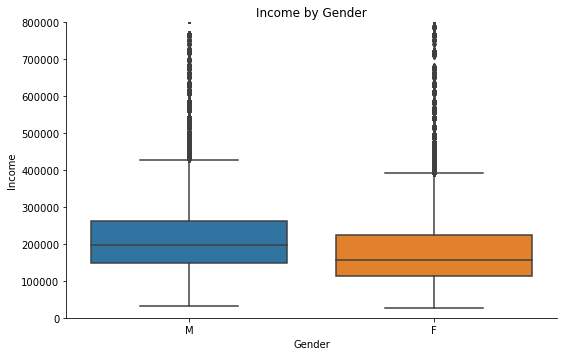

In [121]:
sns.catplot(x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL', data = app_df, height = 5, kind = 'box',aspect = 1.5).set(ylim = (0,800000),xlabel='Gender', ylabel='Income',title = 'Income by Gender')
print(app_df.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f'))) #describe income statistics without scientific notation

Most applicants have an income between $13,500 to $22,500 with the median being $18,000. Males seem to have slightly higher income however, gender does not seem to have a significant influence over the income of the applicants. 

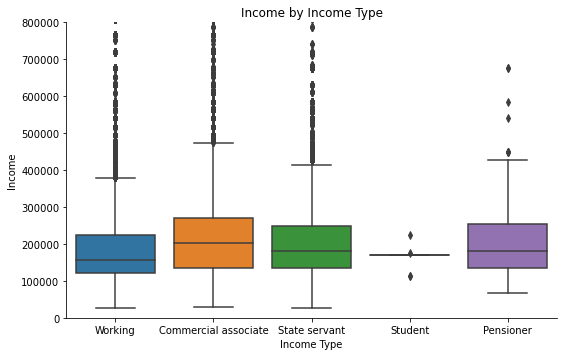

In [122]:
sns.catplot(x = 'NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data = app_df, height = 5, kind = 'box',aspect = 1.5).set(ylim = (0,800000),xlabel='Income Type', ylabel='Income',title = 'Income by Income Type')

Sorting applicants by their income types doesn't change income levels greatly. However, there are a handful of applicants that are working and are commerical associates have a much higher incomes than every other income type.

Laborers                 0.257069
Core staff               0.141306
Sales staff              0.135034
Managers                 0.116598
Drivers                  0.085723
High skill tech staff    0.056806
Accountants              0.052521
Medicine staff           0.044422
Cooking staff            0.026535
Security staff           0.026262
Cleaning staff           0.019205
Private service staff    0.011355
Low-skill Laborers       0.007031
Secretaries              0.006716
Waiters/barmen staff     0.005471
Realty agents            0.003420
HR staff                 0.002543
IT staff                 0.001985
Name: OCCUPATION_TYPE, dtype: float64


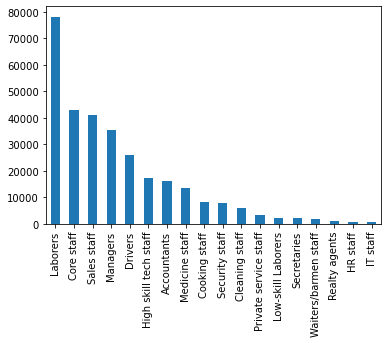

In [112]:
app_df['OCCUPATION_TYPE'].value_counts().plot(kind = 'bar')
print(app_df['OCCUPATION_TYPE'].value_counts()/app_df.shape[0]) #by percentage

The majority of applicants are made up of laborers, core staff, and sales staff.

In [113]:
app_df.shape[0] - app_df['ID'].nunique()

23

There's 23 clients that have applied multiple times. Their applications after the first might have influenced their chances of getting approved.

In [ ]:
app_df['CODE_GENDER'].value_counts().plot.pie(autopct="%.1f%%")
print(app_df['CODE_GENDER'].value_counts())

There are more female than male applicants. The demographic is made up of 62.6% female and 37.4% male.

In [124]:
print(credit_df.MONTHS_BALANCE.describe().apply(lambda x: format(-x, 'f')))

count    -1048575.000000
mean           19.136998
std           -14.023498
min            60.000000
25%            29.000000
50%            17.000000
75%             7.000000
max            -0.000000
Name: MONTHS_BALANCE, dtype: object


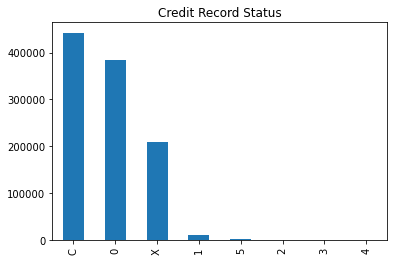

In [116]:
credit_df.STATUS.value_counts().plot.bar(title = 'Credit Record Status')

C indicates that applicants have paid off their loans that month. X indicates that people do not have loans that month. Applicants that have either paid off their loans or do not have loans would have a lower risk of being overdue on their loans and are thus considered good applicants. Applicants that have long standing loans would be considered bad applicants.